In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt


In [12]:
h_DM = np.load("darkmatter_1000GeV.pkl", allow_pickle = True, encoding='latin1')
h_DM_errors2 = np.load("darkmatter_1000GeV_errors2.pkl", allow_pickle = True, encoding='latin1')

hatmos = np.load("atmos.pkl", allow_pickle = True, encoding='latin1')
hatmos_errors2 = np.load("atmos_errors2.pkl", allow_pickle = True, encoding='latin1')

hastro = np.load("astro.pkl", allow_pickle = True, encoding='latin1')
hastro_errors2 = np.load("astro_errors2.pkl", allow_pickle = True, encoding='latin1')

hcorsika = np.load("corsika.pkl", allow_pickle = True, encoding='latin1')
hcorsika = np.load("corsika_errors2.pkl", allow_pickle = True, encoding='latin1')


rateDM = np.sum(h_DM[0])
rateCorsika = np.sum(hcorsika[0])
rateAstro = np.sum(hastro[0])
rateAtmos = np.sum(hatmos[0])

livetime      = 28272940. + 30674072. + 31511810.5 + 31150852. + 30059465.

total_events = np.int(livetime*(rateCorsika + rateAtmos + rateAstro))

print ("Total number of events {:d}".format(total_events))

fraction_astro  = rateAstro / (rateCorsika + rateAtmos + rateAstro)
fraction_atmos  = rateAtmos / (rateCorsika + rateAtmos + rateAstro)

n_atmos = fraction_atmos
n_astro = fraction_astro/n_atmos

print ("Fraction of astro {:.2f}".format(fraction_astro))
print ("Fraction of atmos {:.2f}".format(fraction_atmos))

print (rateDM * livetime)

print ("Nested fraction of astro {:.2f}".format(n_astro))
print ("Nested fraction of atmos {:.2f}".format(n_atmos))


Total number of events 18994
Fraction of astro 0.09
Fraction of atmos 0.91
1096.2127281167714
Nested fraction of astro 0.10
Nested fraction of atmos 0.91


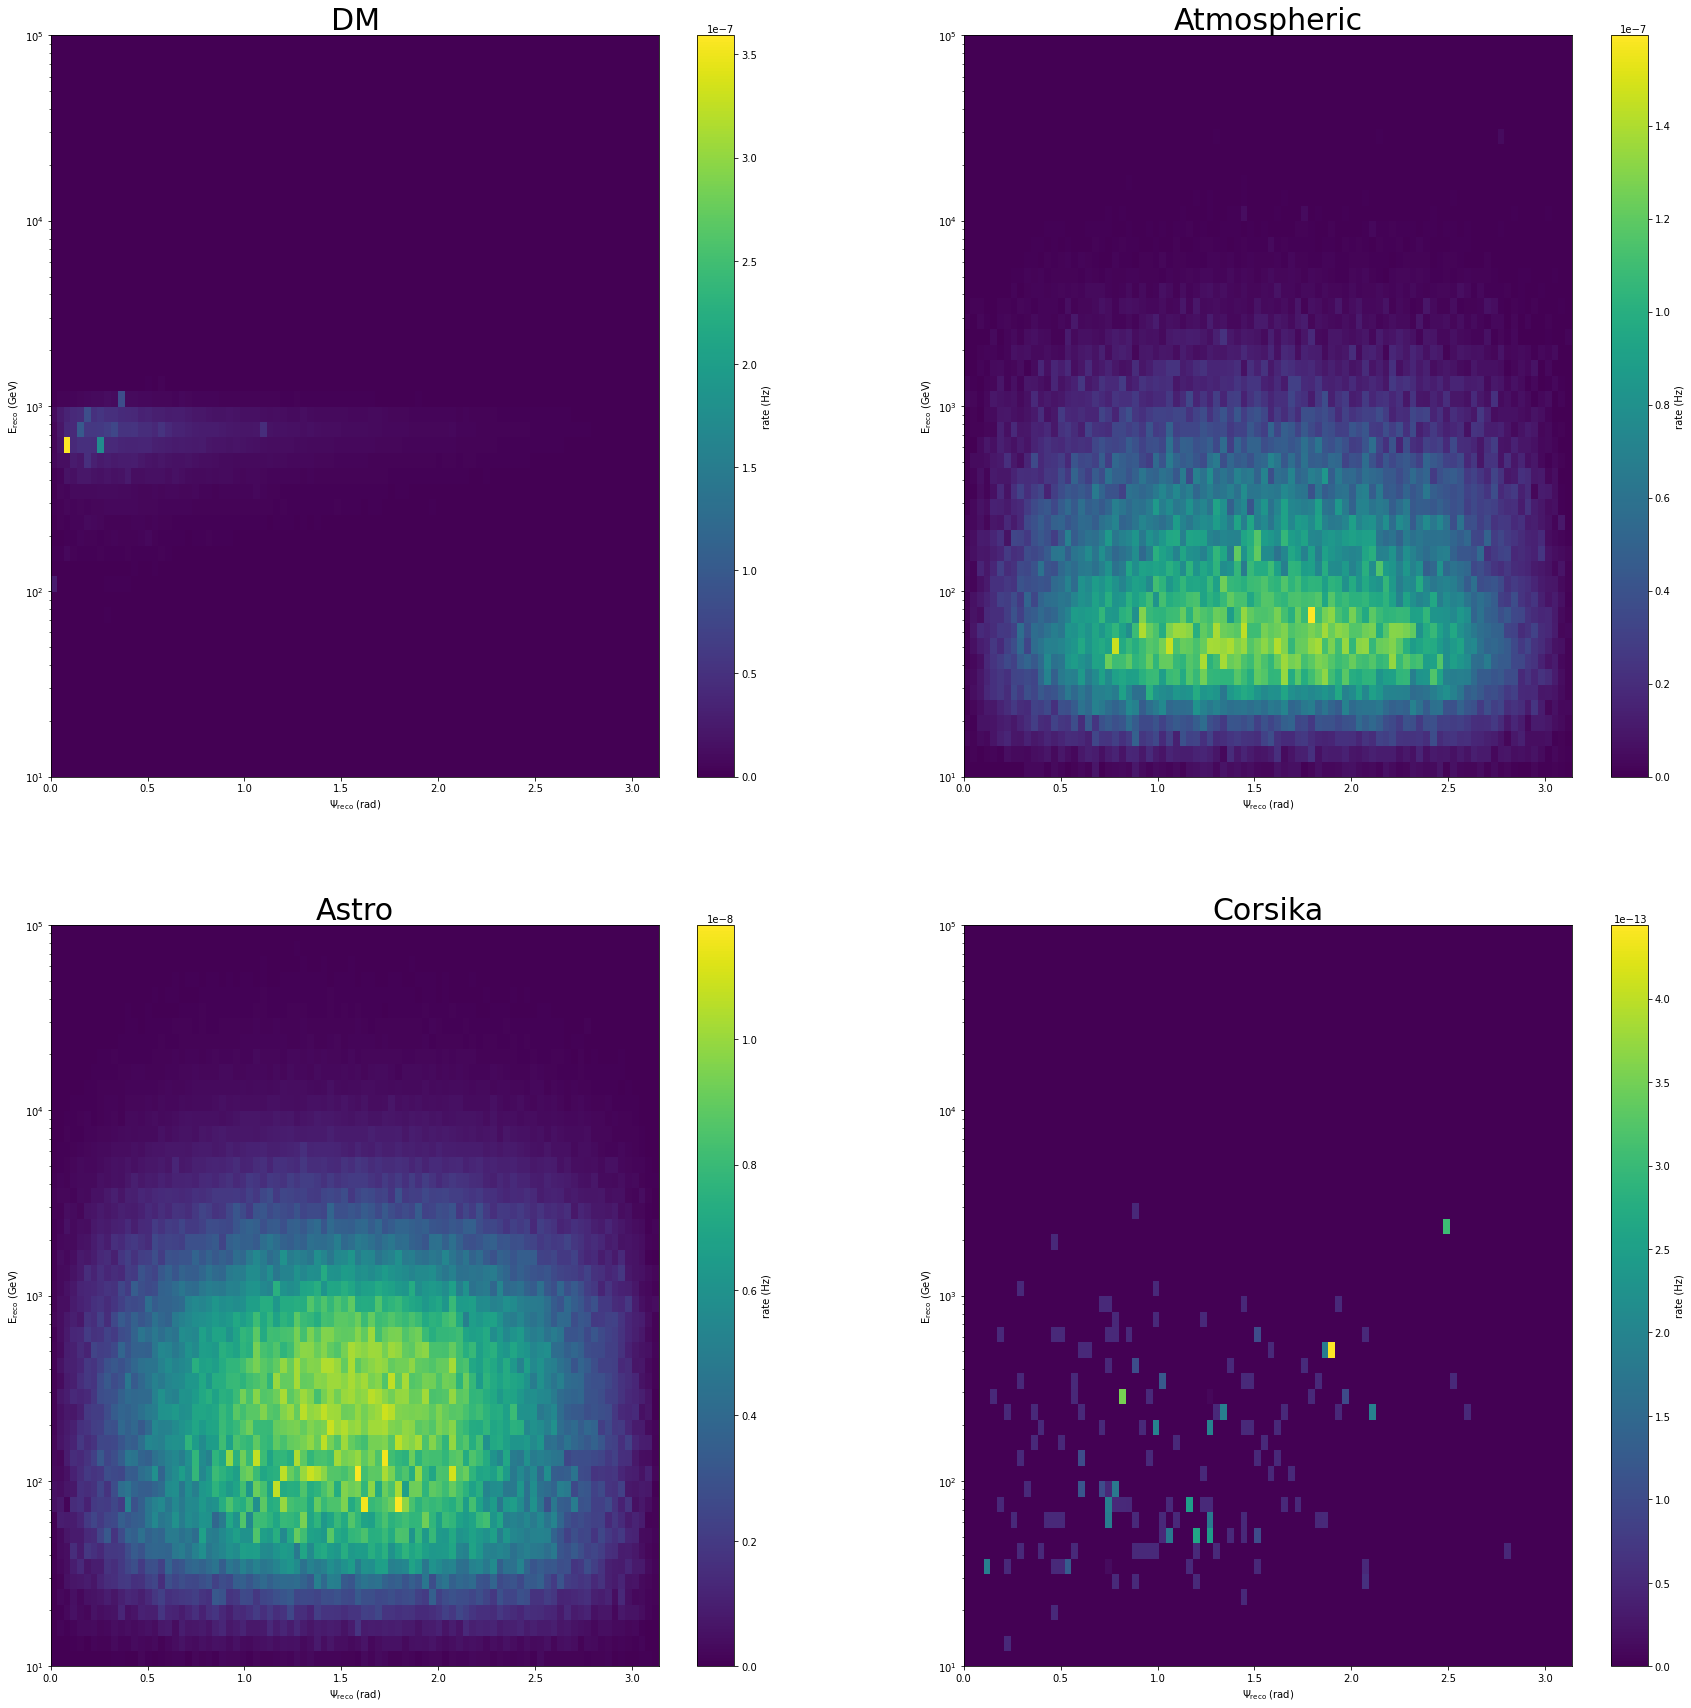

In [13]:
fig,axs = plt.subplots(2,2,figsize=(30,30))
pcm = axs[0,0].pcolormesh(h_DM[2],h_DM[1],h_DM[0])
fig.colorbar(pcm, ax=axs[0,0], label='rate (Hz)')
axs[0,0].set_title("DM", fontsize=30)
axs[0,0].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[0,0].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[0,0].set_yscale('log')

pcm = axs[0,1].pcolormesh(hatmos[2],hatmos[1],hatmos[0])
fig.colorbar(pcm, ax=axs[0,1], label='rate (Hz)')
axs[0,1].set_title("Atmospheric", fontsize=30)
axs[0,1].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[0,1].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[0,1].set_yscale('log')

pcm = axs[1,0].pcolormesh(hastro[2],hastro[1],hastro[0])
fig.colorbar(pcm, ax=axs[1,0], label='rate (Hz)')
axs[1,0].set_title("Astro", fontsize=30)
axs[1,0].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[1,0].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[1,0].set_yscale('log')


pcm = axs[1,1].pcolormesh(hcorsika[2],hcorsika[1],hcorsika[0])
fig.colorbar(pcm, ax=axs[1,1], label='rate (Hz)')
axs[1,1].set_title("Corsika", fontsize=30)
axs[1,1].set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs[1,1].set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs[1,1].set_yscale('log')

In [4]:
shape = h_DM[0].shape

In [5]:
from modeling import PdfBase, Model, Parameter



In [6]:
SignalPDF = PdfBase(h_DM[0].flatten()/np.sum(h_DM[0].flatten()), name="SignalPDF")
AtmosPDF = PdfBase(hatmos[0].flatten()/np.sum(hatmos[0].flatten()), name="AtmosPDF")
CorsikaPDF = PdfBase(hcorsika[0].flatten()/np.sum(hcorsika[0].flatten()), name="CorsikaPDF")
AstroPDF = PdfBase(hastro[0].flatten()/np.sum(hastro[0].flatten()), name="AstroPDF")




In [14]:
from argparse import Namespace

truth = Namespace(f_sig= 0, f_atmos = n_atmos, f_astro = n_astro)

nsig = Parameter(value=truth.f_sig, limits=(0,1), fixed=False, name="f_sig")
natmos = Parameter(value=truth.f_atmos, limits=(0,1), is_nuisance = True, fixed=False, name="f_atmos")
nastro = Parameter(value=truth.f_astro, limits=(0,1), is_nuisance = True, fixed=False, name="f_astro")



In [15]:
nsig.scale = 1
nsig.factor_limits

array([0., 1.])

In [16]:

model = nsig * SignalPDF + (1 - nsig) * (natmos * AtmosPDF + (1 - natmos) * (nastro * AstroPDF + (1 - nastro)*CorsikaPDF))
#model =  (1 - (nastro + natmos) )# *CorsikaPDF

null_model = natmos * AtmosPDF + (1 - natmos) * ( nastro * AstroPDF + (1 - nastro)*CorsikaPDF)



Parameter f_astro already exists in the model, it won't be added again
Parameter f_atmos already exists in the model, it won't be added again
Parameter f_sig already exists in the model, it won't be added again
Parameter f_astro already exists in the model, it won't be added again
Parameter f_atmos already exists in the model, it won't be added again


In [17]:
print(null_model)
print ("-------------")
print(model)


 Model: f_atmos*AtmosPDF + (1-f_atmos)*(f_astro*AstroPDF + (1-f_astro) * CorsikaPDF)
 Number of pdf: 3
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 2
 Name: f_atmos, Value: 0.91, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.10, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
-------------
 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + (1-f_atmos)*(f_astro*AstroPDF + (1-f_astro) * CorsikaPDF))
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.00, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.91, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.10, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True


In [18]:
print (natmos)

 Name: f_atmos, Value: 0.91, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True


In [19]:
from data import DataSet
from llh import LikelihoodRatioTest

In [20]:
#model.parameters["f_sig"].value = 0.002
ds = DataSet()
ds.sample(total_events, null_model)
print (ds)

DataSet type simulation
Total number of events: 19196


In [21]:
total_events = ds.ntotal

print (total_events)

19196


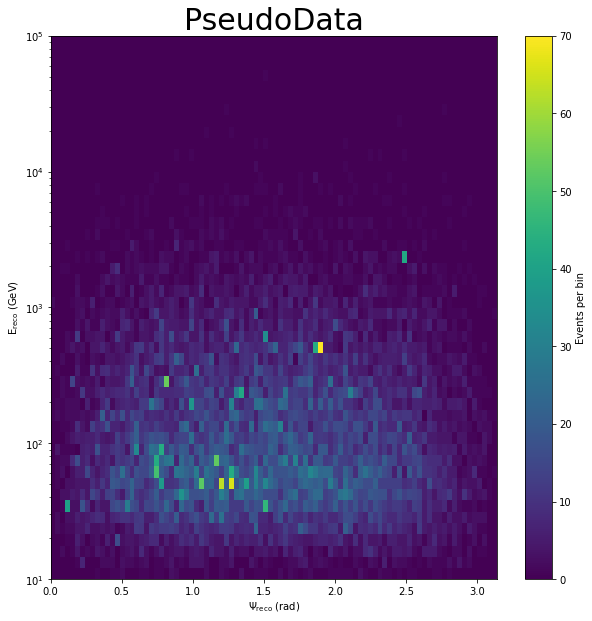

In [22]:
fig,axs = plt.subplots(1,1,figsize=(10,10))

pcm = axs.pcolormesh(hcorsika[2],hcorsika[1],np.reshape(ds.values, shape))
fig.colorbar(pcm, ax=axs, label='Events per bin')
axs.set_title("PseudoData", fontsize=30)
axs.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
axs.set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
axs.set_yscale('log')


In [23]:
lr = LikelihoodRatioTest(model = model, null_model = null_model)

In [24]:
lr.data = ds

In [25]:
lr.fit("H1")

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.609e+04                 │        Ncalls = 63 (63 total)        │
│ EDM = 4.56e-06 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig   │     0     │  0.6e-3   │            │            │    0    │    1    │       │
│ 1 │ f_atmos │   0.905   │   0.008   │            │            │    0    │    1    │       │
│ 2 │ f_astro │   0.13    │   0.07    │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

## Let's fit the 2 hipothesis

In [26]:
%%time
lr.fit("H0")

CPU times: user 108 ms, sys: 3.97 ms, total: 112 ms
Wall time: 116 ms


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.609e+04                 │        Ncalls = 40 (40 total)        │
│ EDM = 4.81e-05 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_atmos │   0.905   │   0.008   │            │            │    0    │    1    │       │
│ 1 │ f_astro │   0.13    │   0.07    │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [27]:
%%time
lr.fit("H1")

CPU times: user 146 ms, sys: 4.22 ms, total: 150 ms
Wall time: 159 ms


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.609e+04                 │        Ncalls = 48 (48 total)        │
│ EDM = 2.01e-06 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig   │     0     │  0.6e-3   │            │            │    0    │    1    │       │
│ 1 │ f_atmos │   0.905   │   0.008   │            │            │    0    │    1    │       │
│ 2 │ f_astro │   0.13    │   0.07    │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [28]:
#Now let's change some paramters 

lr.models["H1"].parameters["f_sig"].fixed = False
  
lr.models["H1"].parameters["f_sig"].value = 0.7

print (lr.models["H1"])
print ("-------------")
print (model)

lr.fit("H1")

 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + (1-f_atmos)*(f_astro*AstroPDF + (1-f_astro) * CorsikaPDF))
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.70, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.90, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.13, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
-------------
 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + (1-f_atmos)*(f_astro*AstroPDF + (1-f_astro) * CorsikaPDF))
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.00, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.91, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.10, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nui

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.609e+04                 │       Ncalls = 208 (208 total)       │
│ EDM = 3.08e-06 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig   │     0     │  0.6e-3   │            │            │    0    │    1    │       │
│ 1 │ f_atmos │   0.904   │   0.008   │            │            │    0    │    1    │       │
│ 2 │ f_astro │   0.13    │   0.07    │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [29]:
fit_parameters  = list(lr.models["H1"].parameters.values())

print ("From minimizer")

print (lr.minimizers["H1"].values)

print ("From model")
for p in fit_parameters:
    print (p.factor, p.value)
    
    


From minimizer
<ValueView of Minuit at 7ff64c4e0f80>
  f_sig: 4.746857906745561e-10
  f_atmos: 0.9044773614124638
  f_astro: 0.12812594842274605
From model
4.746857906745561e-10 4.746857906745561e-10
0.9048202451837997 0.9048202451837997
0.13105784547213567 0.13105784547213567


In [32]:
lr.minimizers["H1"].minos("f_sig")

┌──────────┬───────────────────────┐
│          │         f_sig         │
├──────────┼───────────┬───────────┤
│  Error   │  -0.6e-3  │  0.5e-3   │
│  Valid   │   False   │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   True    │   False   │
└──────────┴───────────┴───────────┘

In [33]:
(lr.minimizers["H1"].mncontour("f_sig", "f_atmos", numpoints = 10)[2])

lr.minimizers["H1"].draw_mncontour("f_sig", "f_atmos", numpoints = 100)

IndexError: list index out of range

### Let's implement an upper limit estimator

In [34]:
conf_level = 90.

fTS = lr.TS
print ("TS", fTS)
lr._minimizers["H1"].print_level = 0

nIterations = 0
eps_TS = 0.005
eps_param = 0.1

deltaTS = 2.71
if conf_level==90:
    deltaTS = 1.64
elif conf_level==95:
    deltaTS = 2.71

    
param_low = fit_parameters[0].factor
param_up = param_low
param_mean = param_low
        
    
dTS = 0
cc = 1

y = []
x = []

lr.models["H1"].parameters["f_sig"].fixed = True
  
while((dTS < deltaTS) and (nIterations<100)):
    nIterations += 1 

    param_up = param_up + 3.*np.abs(param_up)

    print ("Param_up ", param_up)
    
    #We fix the signal to param_up in the H1
    
    lr.models["H1"].parameters["f_sig"].value = param_up
    lr.fit("H1")
    
    print (lr.minimizers["H1"].values)

    if param_up < 0.:
        TS_fix = 0.
    else:
        TS_fix = lr.TS

    dTS = fTS - TS_fix

   # print (dTS)
    y.append(dTS)
    
    x.append(param_up*fit_parameters[0].scale)

nIterations = 0
   
param_low = param_up/4.
 
  
while((cc>0.)  and (nIterations<100)):
            
    nIterations += 1

    param_mean=(param_low+param_up)/2.

    x.append(param_mean*fit_parameters[0].scale)
        #We fix the signal to param_up in the H1
    
    print ("Param_mean ", param_mean)
    
    lr.models["H1"].parameters["f_sig"].value = param_mean
    lr.fit("H1")
    
        
    if param_mean <0.:
        TS_fix = 0.
    else:
        TS_fix = lr.TS
                        
    dTS = fTS - TS_fix
    y.append(dTS)
        
    if(dTS<deltaTS):

        param_low=param_mean
        delta_param=(param_up-param_low)/(param_up)
                   
                
        if((dTS>deltaTS-eps_TS) and (delta_param < eps_param)):
            cc = 0
                    
    if(dTS>deltaTS):
        param_up=param_mean
        delta_param=(param_up-param_low)/(param_up)
                
        if((dTS<deltaTS+eps_TS) and (delta_param < eps_param)):
            cc=0
                    
print (param_up, nIterations)

TS 8.954913209890947e-05
Param_up  0.0012898128312563428
<ValueView of Minuit at 7ff64ca73390>
  f_sig: 0.0012898128312563428
  f_atmos: 0.9055319999669196
  f_astro: 0.11774321584077119
Param_mean  0.0008061330195352143
Param_mean  0.00056429311367465
Param_mean  0.0006852130666049321
Param_mean  0.0007456730430700732
Param_mean  0.0007154430548375027
Param_mean  0.0007305580489537879
Param_mean  0.0007381155460119306
Param_mean  0.0007418942945410019
0.0007456730430700732 8


In [35]:
print (param_up)

0.0007456730430700732


(0.0, 0.003)

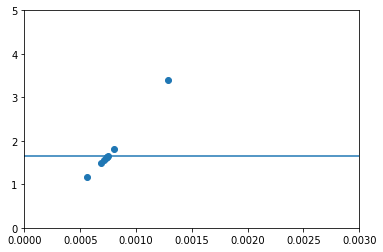

In [36]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y, 'o')
ax.axhline(y=deltaTS)
ax.set_ylim(0,5)
ax.set_xlim(0,0.003)

In [37]:
lr.models["H1"].parameters["f_sig"].fixed = False

print (lr.models["H1"])

 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + (1-f_atmos)*(f_astro*AstroPDF + (1-f_astro) * CorsikaPDF))
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.00, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.91, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.12, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True


In [38]:
%%time
ds.sample(total_events, null_model)

CPU times: user 922 ms, sys: 14.6 ms, total: 937 ms
Wall time: 1.02 s


In [39]:



def compute(n_trials):
    print ("Total trials: ", n_trials)
    
    
    n_h = 0
    n_m = 0
    m_lus = []
    h_lus = []
    xs = []

  
    
    n_data = []
    for n in range(n_trials):
        lr.data.sample(total_events, null_model)
        
        print (n)
        #lr.fit("H0")
        lr.fit("H1")
        
        #Let's checke the sanity of the models.
        if np.any(np.isnan(lr.models["H1"])):
            print ("hitting a nan!")
            break
            
        
        
        if not lr._minimizers["H0"].valid:
            print ("H0 not valid")
            continue
        if not lr._minimizers["H1"].valid:
            print ("H1 not valid")
            continue

        print ("here")
        try:
            lr._minimizers["H1"].minos(sigma = 5.)
            lr._minimizers["H1"].hesse()


            #if lr._minimizers["H1"].merrors["f_sig"].is_valid:
            #    print ("weee")
            #    break


        except Exception as e:
            print(f"exception in n={n}")
            print(e)

        x = lr._minimizers["H1"].values["f_sig"]
        me = lr._minimizers["H1"].merrors["f_sig"]
        dx = lr._minimizers["H1"].errors["f_sig"]
        m_lu = x + me.lower, x + me.upper
        h_lu = x - dx, x - dx
        
        if m_lu[0] < truth.f_sig < m_lu[1]:
            n_m += 1

        if h_lu[0] < truth.f_sig < h_lu[1]:
            n_h += 1

        xs.append(x)
        
        h_lus.append(h_lu)
        m_lus.append(m_lu)
        n_data.append(n)
        
        print ("done with n -> ", n)

        print ("waht?")
    print (m_lus)
    x = np.mean(xs)
    m_l, m_u = np.mean(m_lus, axis=0)
    h_l, h_u = np.mean(h_lus, axis=0)
    return x, m_l, m_u, n_m, n_h, h_l, h_u




In [40]:
lr.data.sample(total_events, null_model)

#lr.fit("H0")
lr.fit("H1")

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.656e+04                 │       Ncalls = 116 (116 total)       │
│ EDM = 1.77e-05 (Goal: 0.0001)    │               up = 0.5               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_sig   │  0.1e-3   │  0.8e-3   │            │            │    0    │    1    │       │
│ 1 │ f_atmos │   0.894   │   0.008   │            │            │    0    │    1    │       │
│ 2 │ f_astro │   0.19    │   0.06    │            │            │    0    │    1    │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [41]:
lr._minimizers["H1"].minos(sigma = 5.)
            

┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │         f_sig         │        f_atmos        │        f_astro        │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │ -0.13e-3  │  5.28e-3  │  -0.043   │   0.031   │   -0.19   │   0.23    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   False   │   False   │   True    │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘

In [42]:
    
lr._minimizers["H1"].hesse()

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,f_sig,0.13e-3,0.81e-3,-0.13e-3,5.28e-3,0,1,
1,f_atmos,0.894,0.008,-0.043,0.031,0,1,
2,f_astro,0.19,0.06,-0.19,0.23,0,1,


In [30]:
        
        #Let's checke the sanity of the models.
        if np.any(np.isnan(lr.models["H1"])):
            print ("hitting a nan!")
            break
            
        
        
        if not lr._minimizers["H0"].valid:
            print ("H0 not valid")
            continue
        if not lr._minimizers["H1"].valid:
            print ("H1 not valid")
            continue

        try:
            lr._minimizers["H1"].minos(sigma = 5.)
            lr._minimizers["H1"].hesse()

SyntaxError: unexpected EOF while parsing (<ipython-input-30-8b25dab124ef>, line 17)

In [44]:
trials = np.arange(10, 70, 10)
lr.models["H1"].parameters["f_sig"].fixed = False
lr.fit("H1")
lr.minimizers["H1"].minos("f_sig", sigma = 3)

┌──────────┬───────────────────────┐
│          │         f_sig         │
├──────────┼───────────┬───────────┤
│  Error   │ -0.13e-3  │  2.76e-3  │
│  Valid   │   True    │   True    │
│ At Limit │   True    │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘

In [45]:
x, m_l, m_u, n_m, n_h, h_l, h_u  = np.transpose([t for t in map(compute, trials)])

Total trials:  10
0
here
done with n ->  0
waht?
1
here
done with n ->  1
waht?
2
here
done with n ->  2
waht?
3
here
done with n ->  3
waht?
4
here
done with n ->  4
waht?
5
here
done with n ->  5
waht?
6
here
done with n ->  6
waht?
7
here
done with n ->  7
waht?
8
here
done with n ->  8
waht?
9
here
done with n ->  9
waht?
[(-0.0033283635221943164, 0.005154997448749319), (-0.00022374573790109875, 0.00022374620667456324), (-0.0005374765603685383, 0.004931355537997282), (0.0, 0.005126739419144146), (0.0, 0.005534074187724359), (-0.0016175812015269686, 0.005493589669780397), (-0.0003035209089687352, 0.004490471472154438), (-0.0017968727158164666, 0.004580691206950111), (0.0, 0.0056017920614465505), (-0.0003974330242013657, 0.0047110232722245345)]
Total trials:  20
0
here
done with n ->  0
waht?
1
here
done with n ->  1
waht?
2
here
done with n ->  2
waht?
3
here
done with n ->  3
waht?
4
here
done with n ->  4
waht?
5
here
done with n ->  5
waht?
6
here
done with n ->  6
waht?
7
here
d

KeyError: 'f_sig'

In [33]:
print(model)

 Model: f_sig*SignalPDF + (1-f_sig)*(f_atmos*AtmosPDF + f_astro*AstroPDF + (1-f_astro - f_atmos) * CorsikaPDF)
 Number of pdf: 4
 - SignalPDF
 - AtmosPDF
 - AstroPDF
 - CorsikaPDF
 Number of parameters: 3
 Name: f_sig, Value: 0.00, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? False
 Name: f_atmos, Value: 0.91, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True
 Name: f_astro, Value: 0.09, Scale: 1.0e+00, Limits: (0.0, 1.0), Fixed: False, Is nuisance? True


(0.0, 1.0)

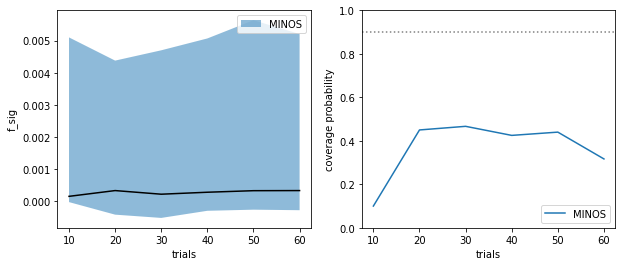

In [57]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(ax[0])
plt.fill_between(trials, m_l, m_u, alpha=0.5, label="MINOS")
plt.plot(trials, x, "-k")
plt.legend()
plt.xlabel("trials")
plt.ylabel("f_sig")
#plt.ylim(0, 0.002)
#plt.semilogx();
plt.sca(ax[1])
plt.plot(trials, n_m/trials, label="MINOS")
plt.axhline(0.90, ls=":", color="0.5", zorder=0)
plt.xlabel(r"trials")
plt.ylabel("coverage probability")
plt.legend()
plt.ylim(0, 1)
#plt.semilogx();

In [57]:
def TS_distribution(n_trials):
    print (n_trials)
    lr._minimizers["H1"].print_level = 0
    lr._minimizers["H0"].print_level = 0
    
    
    TS = []
    
    n_data = []
    for n in range(n_trials):
        ds.sample(total_events, null_model)
        lr.data = ds

        lr.fit("H0")
        lr.fit("H1")

        
        
        if not lr._minimizers["H0"].valid:
            continue
        if not lr._minimizers["H1"].valid:
            continue
        
        TS.append(lr.TS)
        
    return TS


ValueError: Axes instance argument was not found in a figure

In [59]:
TS = TS_distribution(100)


%matplotlib inline
from scipy.stats import chi2
x = np.arange(0, 4, 0.01)
df = 1
rv = chi2(df)

from scipy import signal
imp = signal.unit_impulse(np.size(x),1)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(x, 0.5*imp + 0.5*rv.pdf(x), label =r"$\frac{1}{2}\delta + \frac{1}{2}\chi^2$(1 d.o.f)")
ax.hist(TS, 70, density=True, label="%i Trials"%Ntrials)
ax.set_yscale('log')
ax.set_title(r"$m_\chi$ = %.1f GeV"%mass)
ax.set_ylabel("# trials (norm)")
ax.set_xlabel("TS")
ax.legend()
ax.grid()

CPU times: user 753 ms, sys: 11.6 ms, total: 765 ms
Wall time: 784 ms


In [58]:
%%time 
ev = sample2(total_events, null_model)

CPU times: user 763 ms, sys: 13.8 ms, total: 776 ms
Wall time: 808 ms


In [178]:
dispatch_dict('sds', 33, 3)

Unknown function
